# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
%matplotlib inline

# Importing Datset

In [2]:
train = pd.read_csv("loanpredictiontrain.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Checking Info

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Checking Duplicates

In [4]:
train.duplicated().sum()

0

# Checking for blank strings

In [5]:
np.where(train == " ")

C:\Users\aditi\AppData\Roaming\Python\Python37\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
C:\Users\aditi\AppData\Roaming\Python\Python37\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


(array([], dtype=int64), array([], dtype=int64))

# Removing ID column from the data

In [6]:
new_train = train.drop(['Loan_ID'], axis = 1)

# Checking percentage of null values

In [7]:
## Calculating percentage of null values in each column

for col in new_train.columns: 
    nas = new_train[col].isna().sum()
    percentage= nas/len(new_train[col])
    print("Percentage of Null values in {} :".format(col), percentage*100, "%",'\n')
    
## most na's are in credit history followed by sel_employed

Percentage of Null values in Gender : 2.1172638436482085 % 

Percentage of Null values in Married : 0.4885993485342019 % 

Percentage of Null values in Dependents : 2.44299674267101 % 

Percentage of Null values in Education : 0.0 % 

Percentage of Null values in Self_Employed : 5.211726384364821 % 

Percentage of Null values in ApplicantIncome : 0.0 % 

Percentage of Null values in CoapplicantIncome : 0.0 % 

Percentage of Null values in LoanAmount : 3.5830618892508146 % 

Percentage of Null values in Loan_Amount_Term : 2.2801302931596092 % 

Percentage of Null values in Credit_History : 8.143322475570033 % 

Percentage of Null values in Property_Area : 0.0 % 

Percentage of Null values in Loan_Status : 0.0 % 



In [8]:
new_train.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Checking unique values

In [9]:
for col in new_train.columns:
    if new_train[col].dtype == object:
        a = new_train[col].unique()
        print('Feature: ', col ,'\n',a, '\n'*2, "*"*100)

Feature:  Gender 
 ['Male' 'Female' nan] 

 ****************************************************************************************************
Feature:  Married 
 ['No' 'Yes' nan] 

 ****************************************************************************************************
Feature:  Dependents 
 ['0' '1' '2' '3+' nan] 

 ****************************************************************************************************
Feature:  Education 
 ['Graduate' 'Not Graduate'] 

 ****************************************************************************************************
Feature:  Self_Employed 
 ['No' 'Yes' nan] 

 ****************************************************************************************************
Feature:  Property_Area 
 ['Urban' 'Rural' 'Semiurban'] 

 ****************************************************************************************************
Feature:  Loan_Status 
 ['Y' 'N'] 

 ******************************************************************

# Checking Value Counts

In [10]:
new_train = train.drop(['Loan_ID'], axis = 1)

for col in new_train.columns:
    if new_train[col].dtype == object:
        a = new_train[col].value_counts()
        print('Feature: ', col ,'\n',a, '\n'*2, "*"*100)

Feature:  Gender 
 Male      489
Female    112
Name: Gender, dtype: int64 

 ****************************************************************************************************
Feature:  Married 
 Yes    398
No     213
Name: Married, dtype: int64 

 ****************************************************************************************************
Feature:  Dependents 
 0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64 

 ****************************************************************************************************
Feature:  Education 
 Graduate        480
Not Graduate    134
Name: Education, dtype: int64 

 ****************************************************************************************************
Feature:  Self_Employed 
 No     500
Yes     82
Name: Self_Employed, dtype: int64 

 ****************************************************************************************************
Feature:  Property_Area 
 Semiurban    233
Urban        202
Rural   

# Missing Value Treatment

In [11]:
new_train[new_train.isna().any(axis=1)] 

## there are a total of 134 rows with na's 
## this accounts for 21.82% data
## it is not a good option to drop this data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...
592,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,Y
597,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
600,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y


In [12]:
## Visualising na in gender

new_train[new_train['Gender'].isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [13]:
## Grouping the data

new_train.groupby('Gender')['ApplicantIncome'].mean().to_frame()

,ApplicantIncome
Gender,
Female,4643.473214
Male,5446.460123


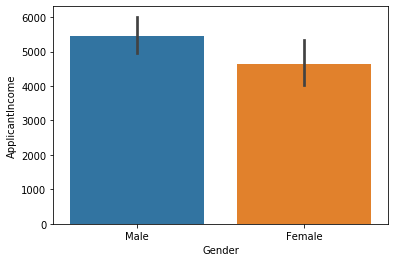

In [14]:
## Creating a bar plot for applicant's income and gender

sns.barplot(x='Gender', y='ApplicantIncome', data = new_train)

One way can be to fill in female where avearge income < 4700

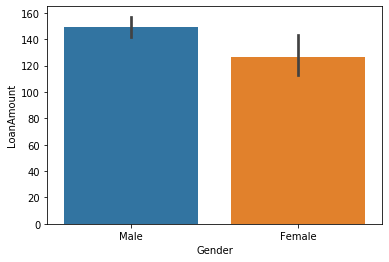

In [15]:
## Creating a boxplot for loan amount and gender

sns.barplot(x='Gender', y='LoanAmount', data = new_train)

In [16]:
new_train.groupby('Gender')['LoanAmount'].mean().to_frame()

,LoanAmount
Gender,
Female,126.697248
Male,149.265957


Another way- to fill in female where loan amount <130

Or we can apply filter bassed on both, loan amount as well as applicant income

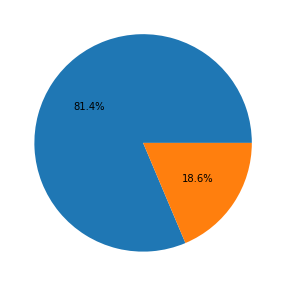

In [17]:
fig = plt.figure(figsize = (5,5))

plt.pie(new_train.Gender.value_counts(), 
        autopct='%1.1f%%');


## lesser number of females
## one option could be to fill all the missing values with male
## but this can bias the data
## total missing =13
## need to explore more before filling these values

Lesser number of females

Another option could be to fill all the missing values with male i.e, mode value


In [18]:
## Checking missing values in married

new_train[new_train['Married'].isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


Marital Status can have an impact on dependents

In [19]:
## Checking null values in dependents

new_train[new_train['Dependents'].isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [20]:
## Checking nulls in self employed

new_train[new_train['Self_Employed'].isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
95,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
107,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
111,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
114,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y
158,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y


# Filling the missing values

In [21]:
## We can see that gender, married, dependents, self-employed have a very small number of missing values.
## We can fill these using mode of the data


new_train.Gender = new_train['Gender'].fillna(new_train.Gender.mode()[0])
new_train.Married = new_train['Married'].fillna(new_train.Married.mode()[0])
new_train.Dependents = new_train['Dependents'].fillna(new_train.Dependents.mode()[0])
new_train.Self_Employed = new_train['Self_Employed'].fillna(new_train.Self_Employed.mode()[0])

new_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [22]:
new_train.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

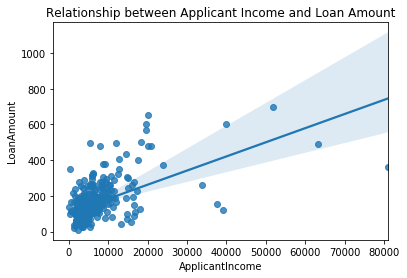

In [23]:
## Loan amount may have a correlation with Applicant Income
## Checking via scatter plot

sns.regplot(x = 'ApplicantIncome',
                   y = 'LoanAmount',
                   data = new_train,
                   fit_reg = True)

plt.title("Relationship between Applicant Income and Loan Amount")
plt.show()

There doesnot appear to be any well defined relationship

In [24]:
## Filling missing values in loan amount with median

new_train.LoanAmount = new_train['LoanAmount'].fillna(new_train.LoanAmount.median())

In [25]:
## Filling loan amount term again with mode

new_train.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [26]:
new_train.Loan_Amount_Term = new_train['Loan_Amount_Term'].fillna(new_train.Loan_Amount_Term.mode()[0])

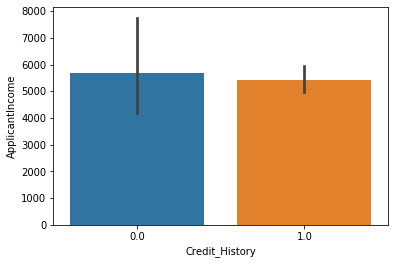

In [27]:
## Credit History may have a relationship with applicant income and loan amount
## Checking for the same

sns.barplot(x='Credit_History', y='ApplicantIncome', data = new_train)

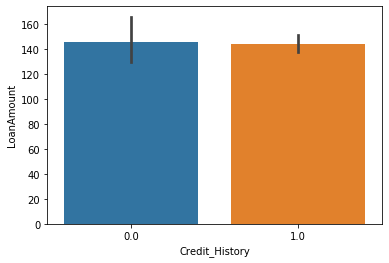

In [28]:
sns.barplot(x='Credit_History', y='LoanAmount', data = new_train)

There is almost no difference

In [29]:
## Filling credit history with mode again

new_train.columns

new_train.Credit_History = new_train['Credit_History'].fillna(new_train['Credit_History'].mode()[0])

In [30]:
## Changing the data type of credit history

new_train.Credit_History = new_train.Credit_History.astype(object)

# Univariate Analysis

### Countplots for categorical variables

Feature:  Gender


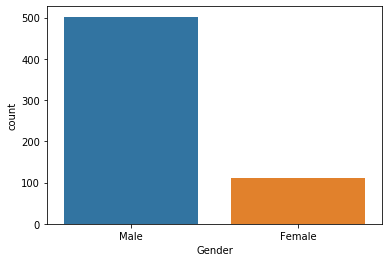

*****************************************************************************************************************************
Feature:  Married


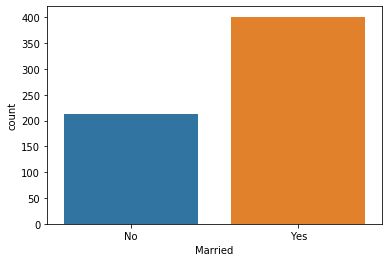

*****************************************************************************************************************************
Feature:  Dependents


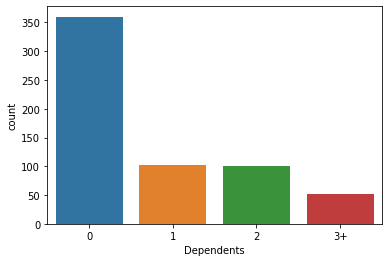

*****************************************************************************************************************************
Feature:  Education


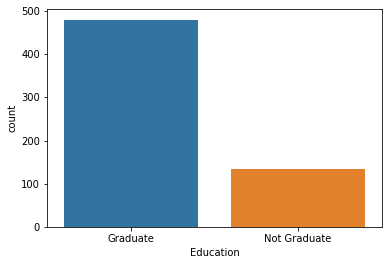

*****************************************************************************************************************************
Feature:  Self_Employed


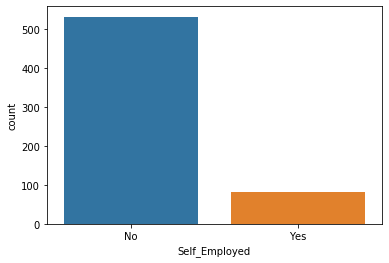

*****************************************************************************************************************************
Feature:  Credit_History


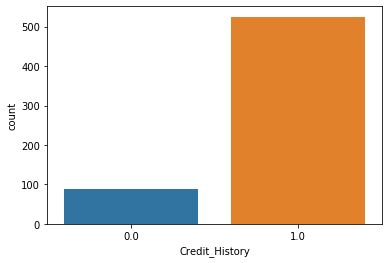

*****************************************************************************************************************************
Feature:  Property_Area


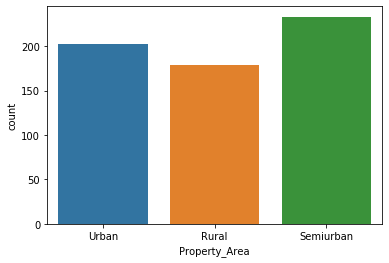

*****************************************************************************************************************************
Feature:  Loan_Status


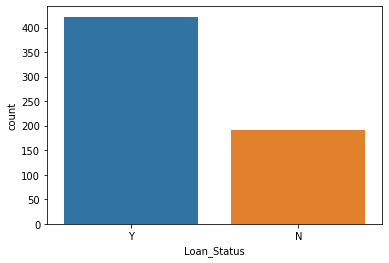

*****************************************************************************************************************************


In [31]:
for col in new_train.columns:
    if new_train[col].dtype == object:
        print("Feature: ", col)
        sns.countplot(new_train[col])
        plt.show()
        print("*"*125)

Clear cases of class imbalance for most variables

### Checking for outliers

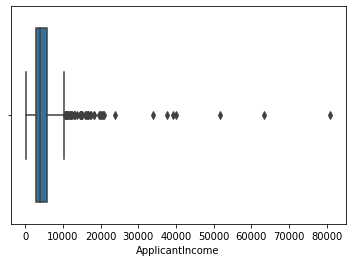

*****************************************************************************************************************************


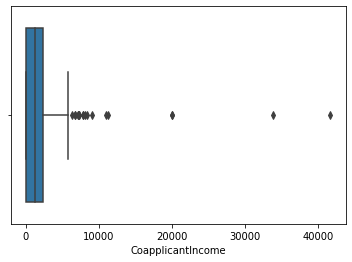

*****************************************************************************************************************************


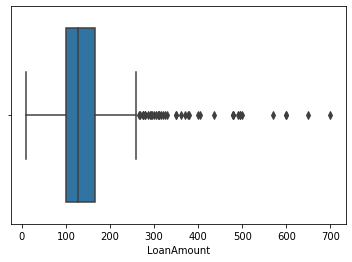

*****************************************************************************************************************************


In [32]:
for col in new_train.iloc[:,:-4].columns:
    if new_train[col].dtype != object:
        sns.boxplot(new_train[col])
        plt.show()
        print("*"*125)

### Outlier Treatment

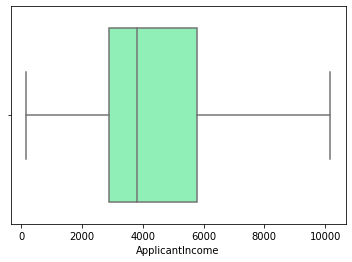

**************************************************************************************************** 




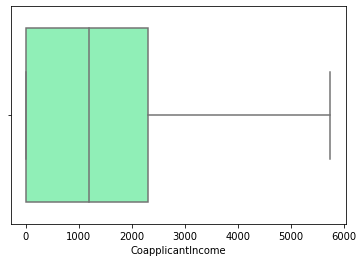

**************************************************************************************************** 




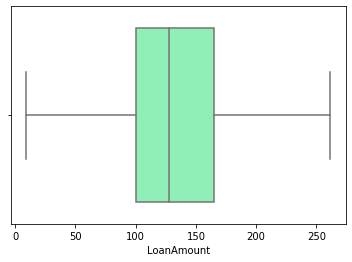

**************************************************************************************************** 




In [33]:
for col in new_train.iloc[:, :-4].columns:
    if new_train[col].dtype != object:
        
        q1, q3 = np.percentile(new_train[col], [25,75])
        
        iqr = q3-q1
        lower_fence = q1 - (1.5 * iqr)
        upper_fence = q3 + (1.5 * iqr)
        
        new_train[col] = new_train[col].apply(lambda x: upper_fence if x > upper_fence else lower_fence if x< lower_fence else x)
        sns.boxplot(x = new_train[col], data= new_train, palette='rainbow', orient='h')
        plt.show()
        print('*'*100, '\n'*2)

### Distribution Plots

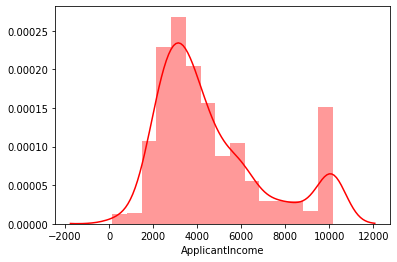

*****************************************************************************************************************************


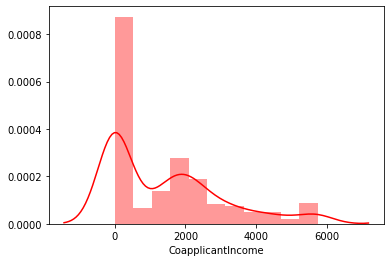

*****************************************************************************************************************************


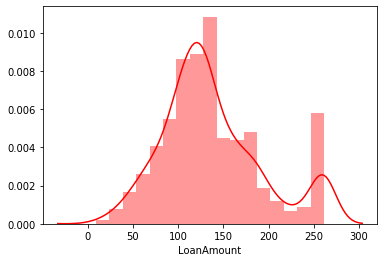

*****************************************************************************************************************************


In [34]:
for col in new_train.iloc[:, :-4].columns:
    if new_train[col].dtype != object:
        sns.distplot(new_train[col], color = 'red')
        plt.show()
        print("*"*125)

Skewed Data

# Bivariate Analysis

### Income wrt Education

Text(0.5, 0.98, '')

<Figure size 576x576 with 0 Axes>

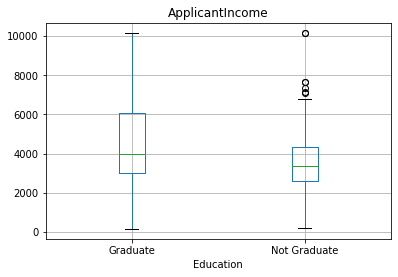

In [35]:
plt.figure(figsize=(8,8))
new_train.boxplot(column = 'ApplicantIncome', by = 'Education')
plt.suptitle("")

Graduates have more Incomes

### Bar graphs for all variables wrt target

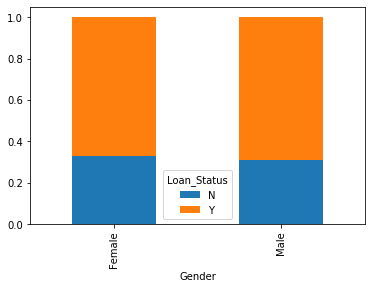

*****************************************************************************************************************************


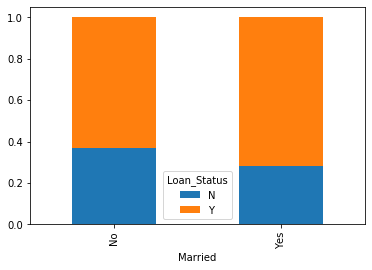

*****************************************************************************************************************************


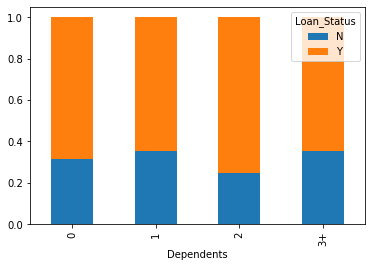

*****************************************************************************************************************************


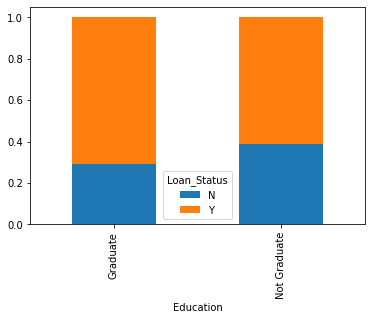

*****************************************************************************************************************************


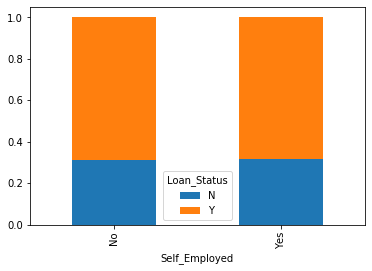

*****************************************************************************************************************************


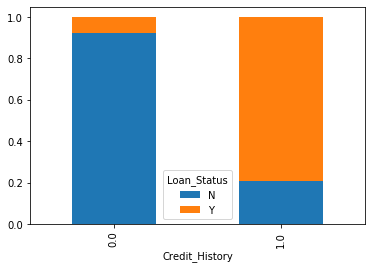

*****************************************************************************************************************************


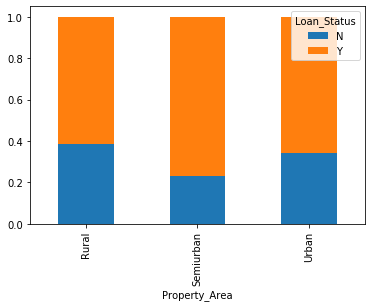

*****************************************************************************************************************************


In [36]:
for col in new_train.iloc[:,:-1].columns:
    if new_train[col].dtype == object:
        a = pd.crosstab(new_train[col], new_train['Loan_Status'])
        a.div(a.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
        plt.show()
        print("*"*125)

The loan status is pretty much the same for almost all variables

People with credit history 1 have high chances of getting loan approval

Proportion of getting loans on semi-urban areas is more compared to the other two

### Loan Status wrt Applicant Income

In [37]:
new_train.groupby('Loan_Status')['ApplicantIncome'].mean().to_frame()


,ApplicantIncome
Loan_Status,
N,4618.735677
Y,4616.372630


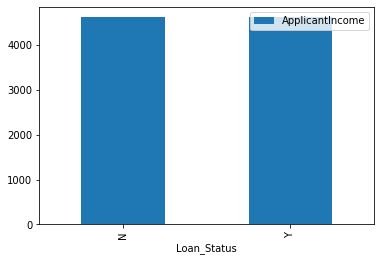

In [38]:
new_train.groupby('Loan_Status')['ApplicantIncome'].mean().to_frame().plot(kind = 'bar')

Applicant Income doesnot seem to have any impact on loan status

### Making bins for applicant income

In [39]:
display(new_train.ApplicantIncome.min(),
new_train.ApplicantIncome.max())

150.0

10171.25

In [40]:
bins = [0, 2500, 4000, 6000, 10000]

groups = ['low', 'average', 'high', 'very high']

new_train['income_bins'] = pd.cut(new_train['ApplicantIncome'], bins, labels = groups)

new_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,income_bins
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1,Urban,Y,high
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1,Rural,N,high
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1,Urban,Y,average
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1,Urban,Y,average
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1,Urban,Y,high


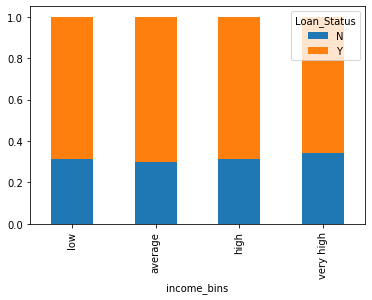

In [41]:
Income_bin = pd.crosstab(new_train['income_bins'], new_train['Loan_Status'] )

Income_bin.div(Income_bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)

Applicant Income thus has no visible impact on loan status

### Binning co-applicants income

In [42]:
display(new_train.CoapplicantIncome.min(),
new_train.CoapplicantIncome.max())

0.0

5743.125

In [43]:
bins = [-1, 1000, 3000, 8000]
groups = ['low', 'average', 'high']

new_train['coapplicant_income_bins'] = pd.cut(new_train['CoapplicantIncome'], bins, labels = groups)

new_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,income_bins,coapplicant_income_bins
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1,Urban,Y,high,low
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1,Rural,N,high,average
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1,Urban,Y,average,low
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1,Urban,Y,average,average
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1,Urban,Y,high,low


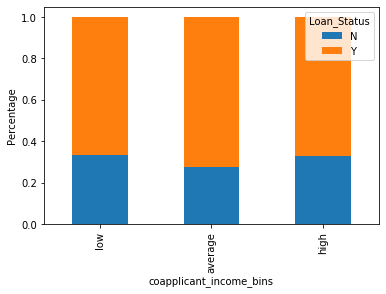

In [44]:
coapp_income_bin = pd.crosstab(new_train['coapplicant_income_bins'], new_train['Loan_Status'] )

coapp_income_bin.div(coapp_income_bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)

P = plt.ylabel("Percentage")

It does not seem to have a very huge impact, however, average income shows more chances of loan approval

### Binning loan amount

In [45]:
display(new_train.LoanAmount.min(),
new_train.LoanAmount.max())

9.0

261.5

In [46]:
bins = [0, 100, 200, 300 ]

groups = ["low", 'average', 'high']

new_train['Loan_Amount_bins'] = pd.cut(new_train['LoanAmount'], bins, labels = groups)

new_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,income_bins,coapplicant_income_bins,Loan_Amount_bins
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1,Urban,Y,high,low,average
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1,Rural,N,high,average,average
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1,Urban,Y,average,low,low
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1,Urban,Y,average,average,average
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1,Urban,Y,high,low,average


In [47]:
new_train['Loan_Amount_bins'].value_counts()

average    380
low        154
high        80
Name: Loan_Amount_bins, dtype: int64

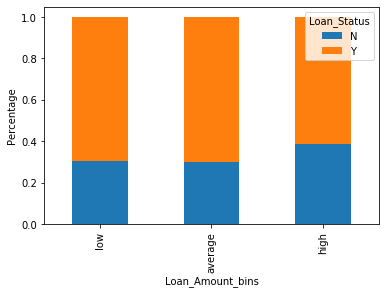

In [48]:
Loan_Amount_bin = pd.crosstab(new_train['Loan_Amount_bins'], new_train['Loan_Status'] )

Loan_Amount_bin.div(Loan_Amount_bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)

P = plt.ylabel("Percentage")

People with low amount have higher chances of getting approval

### Replacing 3+ with 3 in dependents and changing the data type of the column

In [49]:
new_train.Dependents = new_train.Dependents.replace("3+", 3)

new_train.Dependents.value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [50]:
new_train.Dependents = new_train.Dependents.astype(int)

### Replacing the values in Loan status

### N = 0
### Y = 1

In [51]:
new_train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [52]:
new_train["Loan_Status"] = new_train['Loan_Status'].apply(lambda x: 0 if x == "N" else 1)

new_train.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

### Correlation Matrix

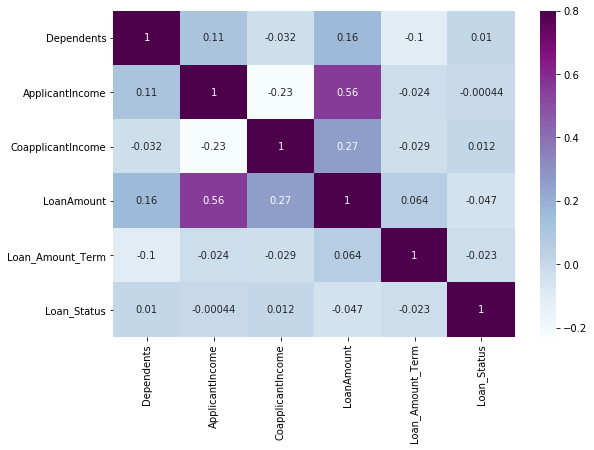

In [53]:
matrix = new_train.corr()
fig = plt.subplots(figsize = (9,6))

sns.heatmap(matrix, vmax = 0.8, annot = True, cmap = "BuPu")

Loan status does not have a good correlation with any of the variables

Applicant Income and loan amount are highly correlated


In [54]:
new_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,income_bins,coapplicant_income_bins,Loan_Amount_bins
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1,Urban,1,high,low,average
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1,Rural,0,high,average,average
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1,Urban,1,average,low,low
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1,Urban,1,average,average,average
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1,Urban,1,high,low,average


# Preprocessing

### Dropping the bin columns

In [55]:
new_train = new_train.drop(['income_bins', 'coapplicant_income_bins', 'Loan_Amount_bins'],1)

new_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1,Urban,1
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1,Rural,0
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1,Urban,1
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1,Urban,1
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1,Urban,1


### Converting target to its original form

In [56]:
new_train["Loan_Status"] = new_train['Loan_Status'].apply(lambda x: "N" if x == 0 else "Y")

new_train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

### Separating dataframe and target

In [57]:
X = new_train.drop('Loan_Status', 1)
y = new_train['Loan_Status']

### Creating Dummies

In [58]:
X = pd.get_dummies(X, drop_first = True)
X.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
0,0,5849.0,0.0,128.0,360.0,1,0,0,0,1,0,1
1,1,4583.0,1508.0,128.0,360.0,1,1,0,0,1,0,0
2,0,3000.0,0.0,66.0,360.0,1,1,0,1,1,0,1
3,0,2583.0,2358.0,120.0,360.0,1,1,1,0,1,0,1
4,0,6000.0,0.0,141.0,360.0,1,0,0,0,1,0,1


# Splitting Data

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                   test_size = 0.3, random_state = 44)

In [60]:
print('X_train: ', len(X_train), '\t', 'y_train', len(y_train))
print('X_test: ', len(X_test), '\t', 'y_test', len(y_test))

X_train:  429 	 y_train 429
X_test:  185 	 y_test 185


# Model Building

# 1. Logistic Regression

In [61]:
# import the regressor 

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [62]:
#training the algorithm

model.fit(X_train, y_train)

LogisticRegression()

In [63]:
## Making predictions on test data

y_test_pred = model.predict(X_test)
y_test_pred[:5]

array(['Y', 'Y', 'N', 'N', 'N'], dtype=object)

In [64]:
### Accuracy reports

print("Accuracy Score Testing Data", accuracy_score(y_test, y_test_pred)*100,'\n')
print("Classification Report" ,'\n', classification_report(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred)
cm

Accuracy Score Testing Data 82.16216216216216 

Classification Report 
               precision    recall  f1-score   support

           N       0.73      0.54      0.62        50
           Y       0.84      0.93      0.88       135

    accuracy                           0.82       185
   macro avg       0.79      0.73      0.75       185
weighted avg       0.81      0.82      0.81       185



array([[ 27,  23],
       [ 10, 125]], dtype=int64)

In [65]:
## Making predictions on train data

y_train_pred = model.predict(X_train)
y_train_pred[:5]

array(['Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [66]:
print("Accuracy Score Testing Data", accuracy_score(y_train, y_train_pred)*100,'\n')
print("Classification Report" ,'\n', classification_report(y_train, y_train_pred))

cm = confusion_matrix(y_train, y_train_pred)
cm

Accuracy Score Testing Data 79.95337995337995 

Classification Report 
               precision    recall  f1-score   support

           N       0.90      0.44      0.59       142
           Y       0.78      0.98      0.87       287

    accuracy                           0.80       429
   macro avg       0.84      0.71      0.73       429
weighted avg       0.82      0.80      0.78       429



array([[ 63,  79],
       [  7, 280]], dtype=int64)

### Results

82% for test data

79.9 ~ 80% for train data

Neither underfit not overfit

# Building a new model with feature engineering

In [67]:
## 1.Total Income

new_train['total_income'] = new_train['ApplicantIncome'] + new_train['CoapplicantIncome']

new_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1,Urban,Y,6000.0


In [68]:
## Binning on the basis of total income

display(new_train.total_income.min(),
new_train.total_income.max())

1442.0

15914.375

In [69]:
bins = [0, 2500, 4000, 6000, 80000]

groups = ["low", 'average', 'high', 'very high']

new_train['total_income_bins'] = pd.cut(new_train['total_income'], bins, labels = groups)

new_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income,total_income_bins
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1,Urban,Y,5849.0,high
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1,Rural,N,6091.0,very high
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1,Urban,Y,3000.0,average
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1,Urban,Y,4941.0,high
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1,Urban,Y,6000.0,high


In [70]:
new_train.total_income_bins.value_counts()

very high    247
high         224
average      119
low           24
Name: total_income_bins, dtype: int64

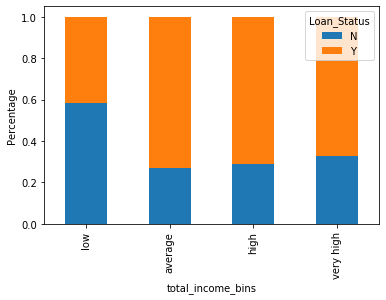

In [71]:
total_income_bin = pd.crosstab(new_train['total_income_bins'], new_train['Loan_Status'] )

total_income_bin.div(total_income_bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
P = plt.ylabel("Percentage")

Low income groups have greater chances of rejection compared to other 3

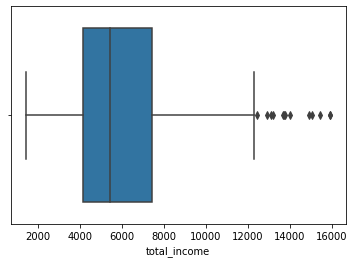

In [72]:
sns.boxplot(new_train.total_income)

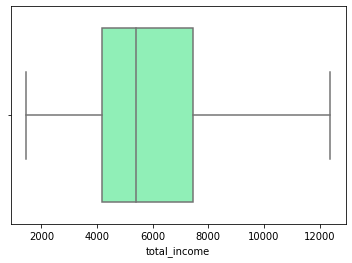

In [73]:
q1, q3 = np.percentile(new_train.total_income, [25,75])
        
iqr = q3-q1
lower_fence = q1 - (1.5 * iqr)
upper_fence = q3 + (1.5 * iqr)
        
new_train.total_income = new_train.total_income.apply(lambda x: upper_fence if x > upper_fence else lower_fence if x< lower_fence else x)
        
sns.boxplot(x = new_train.total_income, data= new_train, palette='rainbow', orient='h')
plt.show()

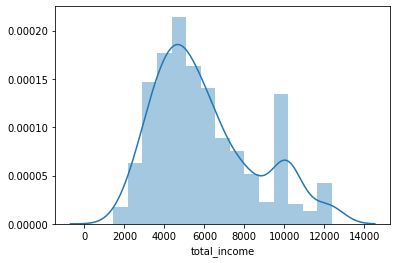

In [74]:
sns.distplot(new_train.total_income)

In [75]:
##2. Creating a column EMI

new_train['emi'] = new_train['LoanAmount']/ new_train['Loan_Amount_Term']

new_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income,total_income_bins,emi
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1,Urban,Y,5849.0,high,0.355556
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1,Rural,N,6091.0,very high,0.355556
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1,Urban,Y,3000.0,average,0.183333
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1,Urban,Y,4941.0,high,0.333333
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1,Urban,Y,6000.0,high,0.391667


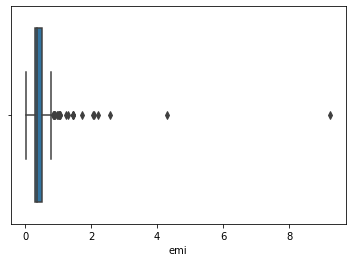

In [76]:
sns.boxplot(new_train.emi)

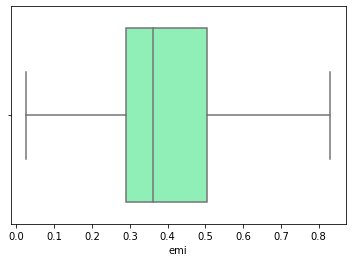

In [77]:
q1, q3 = np.percentile(new_train.emi, [25,75])
        
iqr = q3-q1
lower_fence = q1 - (1.5 * iqr)
upper_fence = q3 + (1.5 * iqr)
        
new_train.emi = new_train.emi.apply(lambda x: upper_fence if x > upper_fence else lower_fence if x< lower_fence else x)
        
sns.boxplot(x = new_train.emi, data= new_train, palette='rainbow', orient='h')
plt.show()

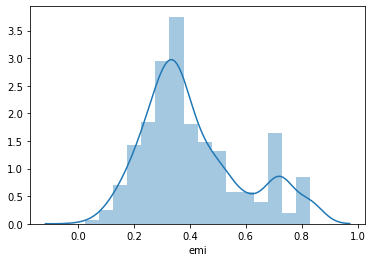

In [78]:
sns.distplot(new_train.emi)

In [79]:
new_train.corr()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,total_income,emi
Dependents,1.000000,0.111565,-0.031510,0.164515,-0.103864,0.086865,0.193709
ApplicantIncome,0.111565,1.000000,-0.228956,0.557953,-0.023926,0.804739,0.499575
CoapplicantIncome,-0.031510,-0.228956,1.000000,0.265021,-0.029295,0.383951,0.246880
LoanAmount,0.164515,0.557953,0.265021,1.000000,0.063612,0.694496,0.841255
Loan_Amount_Term,-0.103864,-0.023926,-0.029295,0.063612,1.000000,-0.041415,-0.447791
total_income,0.086865,0.804739,0.383951,0.694496,-0.041415,1.000000,0.627563
emi,0.193709,0.499575,0.246880,0.841255,-0.447791,0.627563,1.000000


Total income has a good correlation with Loan Amount

Applicant Income has a good correlation with loan amount

Loan amount has a correlation with emi, which is quiet obvious

Total income has a good correlation with applicant income

Emi has a good correlation with totla income

# Preprocessing

In [80]:
## Dropping the variables that have been used to create new variables

X = new_train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Loan_Status', 'total_income_bins'],1)

y = new_train.Loan_Status

X.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,total_income,emi
0,Male,No,0,Graduate,No,1,Urban,5849.0,0.355556
1,Male,Yes,1,Graduate,No,1,Rural,6091.0,0.355556
2,Male,Yes,0,Graduate,Yes,1,Urban,3000.0,0.183333
3,Male,Yes,0,Not Graduate,No,1,Urban,4941.0,0.333333
4,Male,No,0,Graduate,No,1,Urban,6000.0,0.391667


### Encoding

In [81]:
X = pd.get_dummies(X, drop_first = True)
X.head()

,Dependents,total_income,emi,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
0,0,5849.0,0.355556,1,0,0,0,1,0,1
1,1,6091.0,0.355556,1,1,0,0,1,0,0
2,0,3000.0,0.183333,1,1,0,1,1,0,1
3,0,4941.0,0.333333,1,1,1,0,1,0,1
4,0,6000.0,0.391667,1,0,0,0,1,0,1


### Splitting test and train

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                   test_size = 0.3, random_state = 44)

# Model Building

### Logistic Regression

In [83]:
classifier = LogisticRegression(max_iter = 500)

classifier.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [84]:
??LogisticRegression

In [85]:
## Making predictions on test data

y_test_pred = classifier.predict(X_test)
y_test_pred[:5]

array(['Y', 'Y', 'Y', 'N', 'N'], dtype=object)

In [86]:
#To retrieve the intercept:
print(classifier.intercept_)

#For retrieving the slope:
print(classifier.coef_)

[-1.8976018]
[[ 1.64262965e-01 -8.20024877e-05 -6.30667344e-01 -9.08283026e-02
   6.14364576e-01 -4.03617488e-01  2.28953011e-01  3.34029724e+00
   4.98261942e-01 -1.86007422e-01]]


In [87]:
### Accuracy reports

print("Accuracy Score Testing Data", accuracy_score(y_test, y_test_pred)*100,'\n')
print("Classification Report" ,'\n', classification_report(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred)
cm

Accuracy Score Testing Data 84.32432432432432 

Classification Report 
               precision    recall  f1-score   support

           N       0.86      0.50      0.63        50
           Y       0.84      0.97      0.90       135

    accuracy                           0.84       185
   macro avg       0.85      0.74      0.77       185
weighted avg       0.85      0.84      0.83       185



array([[ 25,  25],
       [  4, 131]], dtype=int64)

In [88]:
## Making predictions on train data

y_train_pred = classifier.predict(X_train)
y_train_pred[:5]

array(['Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [89]:
print("Accuracy Score Testing Data", accuracy_score(y_train, y_train_pred)*100,'\n')
print("Classification Report" ,'\n', classification_report(y_train, y_train_pred))

cm = confusion_matrix(y_train, y_train_pred)
cm

Accuracy Score Testing Data 79.48717948717949 

Classification Report 
               precision    recall  f1-score   support

           N       0.92      0.42      0.57       142
           Y       0.77      0.98      0.87       287

    accuracy                           0.79       429
   macro avg       0.85      0.70      0.72       429
weighted avg       0.82      0.79      0.77       429



array([[ 59,  83],
       [  5, 282]], dtype=int64)

Accuracy improved for test data after feature engineering but it decreased for train

## Changing Parameters

In [90]:
param_grid = {'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.2, 1.5, 1.9, 2.0],
'max_iter': [300, 400, 500,700],
             'solver' : ['lbfgs','sag', 'saga','newton-cg']}

In [91]:
grid = GridSearchCV(LogisticRegression(),
                    param_grid)

In [92]:
grid.fit(X_train, y_train)

C:\Users\aditi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aditi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aditi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aditi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aditi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                               1.2, 1.5, 1.9, 2.0],
                         'max_iter': [300, 400, 500, 700],
                         'solver': ['lbfgs', 'sag', 'saga', 'newton-cg']})

In [93]:
## Best parameters given by grid search CV

display(grid.best_params_,
       grid.best_score_)

{'C': 0.5, 'max_iter': 300, 'solver': 'newton-cg'}

0.7948563611491108

In [94]:
## Making predictions on test data

y_test_pred = grid.predict(X_test)
y_test_pred[:5]

array(['Y', 'Y', 'Y', 'N', 'N'], dtype=object)

In [95]:
#To retrieve the intercept:
print(classifier.intercept_)

#For retrieving the slope:
print(classifier.coef_)

[-1.8976018]
[[ 1.64262965e-01 -8.20024877e-05 -6.30667344e-01 -9.08283026e-02
   6.14364576e-01 -4.03617488e-01  2.28953011e-01  3.34029724e+00
   4.98261942e-01 -1.86007422e-01]]


In [96]:
### Accuracy reports

print("Accuracy Score Testing Data", accuracy_score(y_test, y_test_pred)*100,'\n')
print("Classification Report" ,'\n', classification_report(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred)
cm

Accuracy Score Testing Data 84.32432432432432 

Classification Report 
               precision    recall  f1-score   support

           N       0.86      0.50      0.63        50
           Y       0.84      0.97      0.90       135

    accuracy                           0.84       185
   macro avg       0.85      0.74      0.77       185
weighted avg       0.85      0.84      0.83       185



array([[ 25,  25],
       [  4, 131]], dtype=int64)

### It is giving almost the same result

## Random Forest Algorithm

In [97]:
# Defining Classifier

clf = RandomForestClassifier()

In [98]:
#list of estimators i.e number of Tress to be Considered for Training

param_dist = {
             "n_estimators": [300,400,500,600,700,800,900],
             'max_depth': [10,20,30],
             }

In [99]:
rf = GridSearchCV(clf, param_grid=param_dist, cv = 3) 

In [100]:
# Fitting Gridsearch to Training Data:

rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [300, 400, 500, 600, 700, 800, 900]})

In [101]:
# Checking best scores and parameters

print(rf.best_score_)

print(rf.best_params_)

0.752913752913753
{'max_depth': 10, 'n_estimators': 300}


In [102]:
## Predictions on test data:

y_predict = rf.predict(X_test)
y_predict[:15]

array(['Y', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'Y', 'Y'], dtype=object)

In [103]:
## Checking accuracy and other metrices:

print("Accuracy Score Testing Data", accuracy_score(y_predict,y_test)*100,'\n')
print("Classification Report" ,'\n', classification_report(y_test, y_predict))

cm = confusion_matrix(y_test, y_predict)
cm

Accuracy Score Testing Data 80.54054054054053 

Classification Report 
               precision    recall  f1-score   support

           N       0.66      0.58      0.62        50
           Y       0.85      0.89      0.87       135

    accuracy                           0.81       185
   macro avg       0.76      0.73      0.74       185
weighted avg       0.80      0.81      0.80       185



array([[ 29,  21],
       [ 15, 120]], dtype=int64)

#### There is more difference between the testing and training score compared to logistic model

### We can finally use Logistic regression (Best Parameters from Grid Search CV) for making final predictions on the test data further

### Loading the test data

In [104]:
test = pd.read_csv("loanpredictiontest.csv")
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [105]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [106]:
test.Gender = test['Gender'].fillna(test.Gender.mode()[0])
test.Dependents = test['Dependents'].fillna(test.Dependents.mode()[0])
test.Self_Employed = test['Self_Employed'].fillna(test.Self_Employed.mode()[0])
test.LoanAmount = test['LoanAmount'].fillna(test.LoanAmount.median())
test.Loan_Amount_Term = test['Loan_Amount_Term'].fillna(test.Loan_Amount_Term.mode()[0])
test.Credit_History = test['Credit_History'].fillna(test['Credit_History'].mode()[0])

test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [107]:
new_test = test.drop('Loan_ID',1)

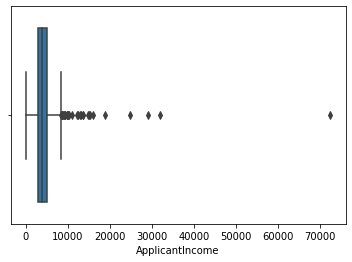

*****************************************************************************************************************************


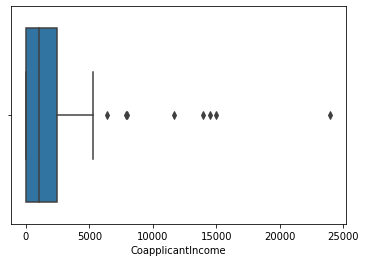

*****************************************************************************************************************************


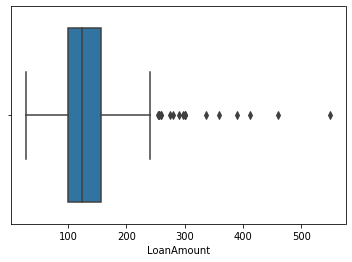

*****************************************************************************************************************************


In [108]:
for col in new_test.iloc[:,:-3].columns:
    if new_test[col].dtype != object:
        sns.boxplot(new_test[col])
        plt.show()
        print("*"*125)

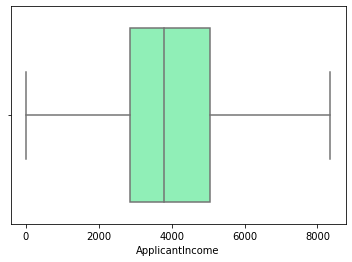

**************************************************************************************************** 




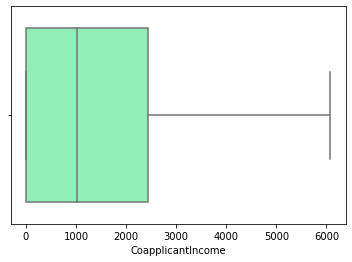

**************************************************************************************************** 




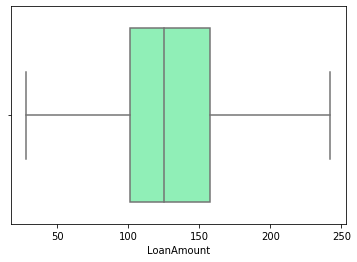

**************************************************************************************************** 




In [109]:
for col in new_test.iloc[:, :-3].columns:
    if new_test[col].dtype != object:
        
        q1, q3 = np.percentile(new_test[col], [25,75])
        
        iqr = q3-q1
        lower_fence = q1 - (1.5 * iqr)
        upper_fence = q3 + (1.5 * iqr)
        
        new_test[col] = new_test[col].apply(lambda x: upper_fence if x > upper_fence else lower_fence if x< lower_fence else x)
        sns.boxplot(x = new_test[col], data= new_test, palette='rainbow', orient='h')
        plt.show()
        print('*'*100, '\n'*2)

In [110]:
new_test.Dependents = new_test.Dependents.replace("3+", 3)

new_test.Dependents = new_test.Dependents.astype(int)

In [111]:
## 1.Total Income

new_test['total_income'] = new_test['ApplicantIncome'] + new_test['CoapplicantIncome']

new_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,total_income
0,Male,Yes,0,Graduate,No,5720.0,0.0,110.0,360.0,1.0,Urban,5720.0
1,Male,Yes,1,Graduate,No,3076.0,1500.0,126.0,360.0,1.0,Urban,4576.0
2,Male,Yes,2,Graduate,No,5000.0,1800.0,208.0,360.0,1.0,Urban,6800.0
3,Male,Yes,2,Graduate,No,2340.0,2546.0,100.0,360.0,1.0,Urban,4886.0
4,Male,No,0,Not Graduate,No,3276.0,0.0,78.0,360.0,1.0,Urban,3276.0


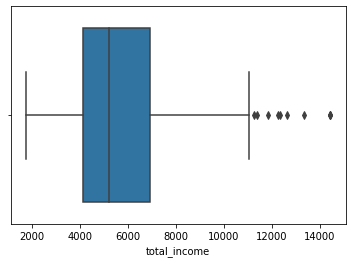

In [112]:
sns.boxplot(new_test.total_income)

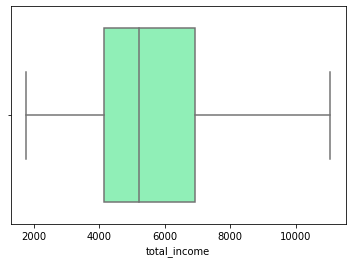

In [113]:
q1, q3 = np.percentile(new_test.total_income, [25,75])
        
iqr = q3-q1
lower_fence = q1 - (1.5 * iqr)
upper_fence = q3 + (1.5 * iqr)
        
new_test.total_income = new_test.total_income.apply(lambda x: upper_fence if x > upper_fence else lower_fence if x< lower_fence else x)
        
sns.boxplot(x = new_test.total_income, data= new_test, palette='rainbow', orient='h')
plt.show()

In [114]:
##2. Creating a column EMI

new_test['emi'] = new_test['LoanAmount']/ new_test['Loan_Amount_Term']

new_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,total_income,emi
0,Male,Yes,0,Graduate,No,5720.0,0.0,110.0,360.0,1.0,Urban,5720.0,0.305556
1,Male,Yes,1,Graduate,No,3076.0,1500.0,126.0,360.0,1.0,Urban,4576.0,0.350000
2,Male,Yes,2,Graduate,No,5000.0,1800.0,208.0,360.0,1.0,Urban,6800.0,0.577778
3,Male,Yes,2,Graduate,No,2340.0,2546.0,100.0,360.0,1.0,Urban,4886.0,0.277778
4,Male,No,0,Not Graduate,No,3276.0,0.0,78.0,360.0,1.0,Urban,3276.0,0.216667


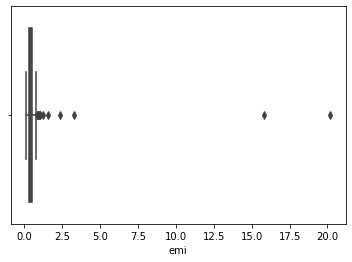

In [115]:
sns.boxplot(new_test.emi)

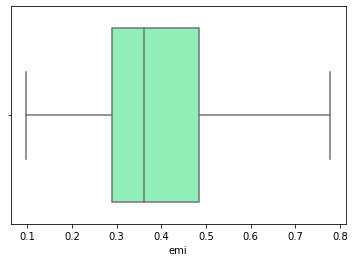

In [116]:
q1, q3 = np.percentile(new_test.emi, [25,75])
        
iqr = q3-q1
lower_fence = q1 - (1.5 * iqr)
upper_fence = q3 + (1.5 * iqr)
        
new_test.emi = new_test.emi.apply(lambda x: upper_fence if x > upper_fence else lower_fence if x< lower_fence else x)
        
sns.boxplot(x = new_test.emi, data= new_test, palette='rainbow', orient='h')
plt.show()

In [117]:
## Dropping the variables that have been used to create new variables

tst = new_test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'],1)

tst.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,total_income,emi
0,Male,Yes,0,Graduate,No,1.0,Urban,5720.0,0.305556
1,Male,Yes,1,Graduate,No,1.0,Urban,4576.0,0.350000
2,Male,Yes,2,Graduate,No,1.0,Urban,6800.0,0.577778
3,Male,Yes,2,Graduate,No,1.0,Urban,4886.0,0.277778
4,Male,No,0,Not Graduate,No,1.0,Urban,3276.0,0.216667


In [118]:
# Encoding

X = pd.get_dummies(tst, drop_first = True)
X.head()

,Dependents,Credit_History,total_income,emi,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,1.0,5720.0,0.305556,1,1,0,0,0,1
1,1,1.0,4576.0,0.350000,1,1,0,0,0,1
2,2,1.0,6800.0,0.577778,1,1,0,0,0,1
3,2,1.0,4886.0,0.277778,1,1,0,0,0,1
4,0,1.0,3276.0,0.216667,1,0,1,0,0,1


In [119]:
classifier = LogisticRegression(C= 0.5, max_iter= 300, solver= 'newton-cg')

classifier.fit(X_train, y_train)

LogisticRegression(C=0.5, max_iter=300, solver='newton-cg')

In [120]:
#To retrieve the intercept:
print(classifier.intercept_)

#For retrieving the slope:
print(classifier.coef_)

[-1.91099581]
[[ 9.05284813e-02 -5.98672726e-05 -4.37925774e-01  1.34760631e-01
   4.15297034e-01 -3.32054612e-01  1.46617512e-01  2.93761530e+00
   6.45213871e-01  4.35844339e-02]]


In [121]:
## Making predictions on test data

predicted = classifier.predict(X)
predicted[:5]

array(['N', 'N', 'N', 'N', 'N'], dtype=object)